In [1]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
import cPickle

%matplotlib inline

# Import

In [2]:
# =============================================
#
# load cifar-10-small
#
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )

# Clean

In [3]:
#  project down
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
N = 1000
D = 10
 
# only keep N items
features = features[ 0:N, : ] 
labels = labels[ 0:N, : ]
 
    
# project down into a D-dimensional space
# features = np.dot( features, np.random.randn( 3072, D) )



# #  for some reason this method killed my kernel every time even though
# #  it's copy pasted straight from the lab into a py27 notebook that has
# #  worked everywhere else, I'm just doing it with a for loop this time
# new_features = []
# for i in range(features.shape[0]):
#     new_features.append(np.dot(features[i], np.random.randn( 3072, D)))
# features = np.asarray(new_features)


# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

# Model Definition

In [4]:
class simple_gradient_decent_classifier():
    def __init__(self, features, labels):
        self.W = np.random.random((features.shape[1] + 1,features.shape[1])) / 1000000.0
#         self.features = features
        #  add a bias row of 1's so dim is 1000 x 11
        self.features = np.hstack((features, np.atleast_2d(np.ones(features.shape[0])).T))
        
        self.labels = labels
        self.delta = 0.000001
        self.NUM_EPOCHS = 2000
     
        self.loss_during_training = []
        self.accuracy_during_training = []
        
        
        self.grad_f = grad(self.calculate_loss)
    
    def fit (self):
        
        step_size = 0.1
        for i in range(0,self.NUM_EPOCHS):
#             loss_function_value, grad = self.numerical_gradient( self.calculate_loss, self.W )
            loss_function_value = self.calculate_loss(self.W)
            grad = self.grad_f( self.W )
            self.W = self.W - step_size * grad
            
            self.loss_during_training.append(loss_function_value)
            accuracy_tmp = self.accuracy_score()
            self.accuracy_during_training.append(accuracy_tmp)
            
            print(str(i) + "  " + str(loss_function_value) + "  " + str(accuracy_tmp))
            
            
    
    
    def numerical_gradient(self, loss_function, W):
        #  find grad for each instance
        grads = np.zeros((W.shape[0], W.shape[1]))
        h = self.delta
            
        
        #  first computation of the loss before any weight changes
        loss_function_value = loss_function(self.W)
        
        
        for i in range(W.shape[0]):
            for j in range(W.shape[1]):
                #  calculate loss, then calculate loss with jitter
                # then,       gradient_of_weight = (f(x + h) - f(x)) / h
                jittered_W = W
                jittered_W[i,j] = jittered_W[i,j] + h
                weight_grad = (loss_function(jittered_W) - loss_function_value) / h
                grads[i,j] = weight_grad
        
        
        return loss_function_value, grads
        
    
    def calculate_loss(self, W):
        #  find loss for each instance, there should be one loss for each instance
        #  vectorized this should return a vector of the losses for the whole data matrix

#         pdb.set_trace()
        
        #  the loss function needs the correct labels
        correct_indexes = list(self.labels[:,0])
        
        score_mat = self.linear_score_function(W, self.features)
        probs = np.exp( score_mat[np.arange(len(score_mat)),correct_indexes]) / \
                np.sum(np.exp(score_mat), axis=1)

#         probs = np.exp(np.choose(correct_indexes, score_mat.T)) / \
#                 np.sum(np.exp(score_mat), axis=1)
        Lis = - np.log(probs)
        L = np.mean(Lis)
        return L
    
    

    
    def linear_score_function(self, W, features):
        #  compute all scores in one fell swoop
        # Wxi + b
#         return features.dot(W)
        return np.dot(features, W)


        
        
        
        
            
    def accuracy_score(self):
        
        score_mat = self.linear_score_function(self.W, self.features)
        predicted = np.argmax(score_mat, axis=1)
        
        num_correct = np.sum(predicted == self.labels[:,0])
        return float(num_correct) / float(self.labels.shape[0])   
            
            
            
            
    def get_plot_data(self):
        return self.loss_during_training, self.accuracy_during_training
            
            
            
            
    def plot_training_metrics(self):
        fig, axes = plt.subplots(1,2)
        
        axes[0].plot(self.accuracy_during_training)
        axes[0].set_title("Accuracy")
        axes[0].set_xlabel('Epochs')
        axes[0].set_ylabel('Classification Accuracy (%)')
        axes[0].set_xlim(0,1000)
        axes[0].set_ylim(0,0.50)

        
        axes[1].plot(self.loss_during_training)
        axes[1].set_title("Loss")
        axes[1].set_xlabel('Epochs')
        axes[1].set_ylabel('Cost Function (softmax)')
        axes[1].set_xlim(0,1000)
        axes[1].set_ylim(1.0,5.0)

# Results

In [5]:
clf = simple_gradient_decent_classifier(features, labels)

In [6]:
clf.fit()

0  8.03008554671  0.282
1  6.16763591149  0.294
2  6.18444377267  0.315
3  5.70353834391  0.328
4  5.39521953688  0.351
5  5.21076594088  0.331
6  5.4659318927  0.362
7  5.28775041267  0.368
8  5.16519244051  0.378
9  4.71815968574  0.385
10  4.75067933701  0.391
11  4.53532032095  0.403
12  4.81790474021  0.429
13  4.05629488478  0.434
14  4.17762054538  0.448
15  3.78464912677  0.451
16  3.8019261215  0.45
17  3.76945482219  0.455
18  3.90813345496  0.474
19  3.59080055633  0.48
20  3.59429759399  0.482
21  3.48757836974  0.48
22  3.60955583277  0.496
23  3.39395023101  0.491
24  3.46869226191  0.495
25  3.31267703935  0.494
26  3.40658090077  0.508
27  3.24258512784  0.509
28  3.30352075138  0.513
29  3.16047470827  0.518
30  3.22638231325  0.526
31  3.09636146982  0.528
32  3.14640164545  0.53
33  3.03284969983  0.528
34  3.0890045876  0.535
35  2.99599537703  0.521
36  3.04931589359  0.538
37  2.94597911024  0.525
38  2.98563815668  0.548
39  2.8847291288  0.535
40  2.90955580694 

In [11]:
def plot_training_metrics(clf):
    fig, axes = plt.subplots(1,2,figsize=(20,10))
    loss_during_training, accuracy_during_training = clf.get_plot_data()
    
    
    axes[0].plot(accuracy_during_training)
    axes[0].set_title("Accuracy")
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Classification Accuracy (%)')
#     axes[0].set_xlim(0,1000)
#     axes[0].set_ylim(0,0.50)


    axes[1].plot(loss_during_training)
    axes[1].set_title("Loss")
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Cost Function (softmax)')
#     axes[1].set_xlim(0,1000)
#     axes[1].set_ylim(1.5,5.0)

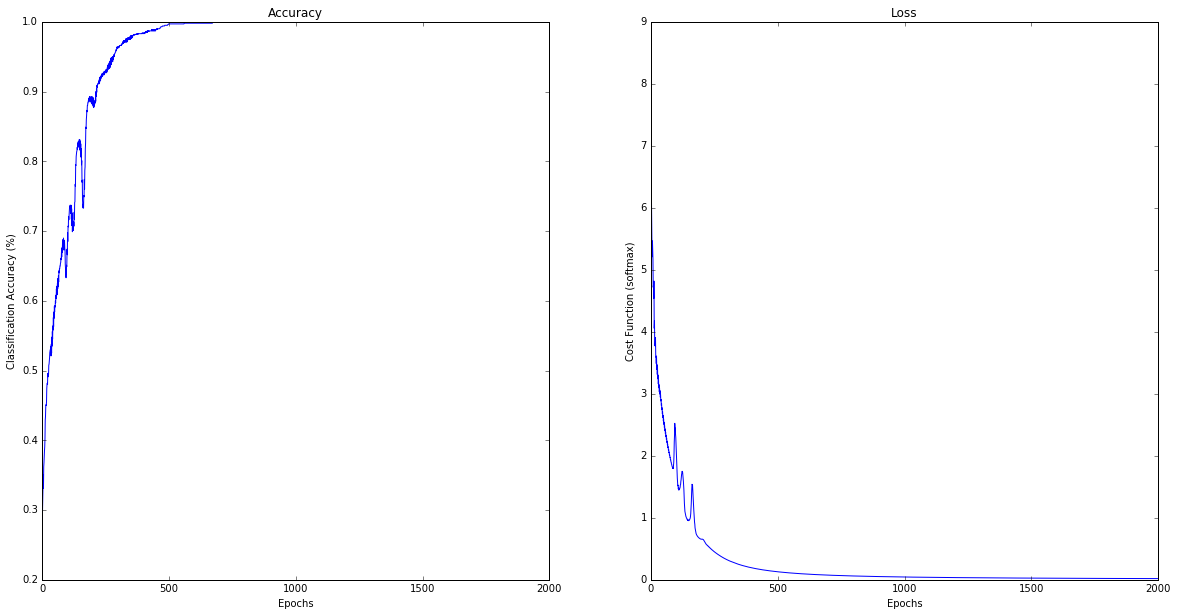

In [12]:
plot_training_metrics(clf)